# User And Periodical Behavior Analysis

In this ipython notebook, we analyse the type of users. How about their distributions and and what are their origins.

In [8]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import json
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import time
import pickle
import os

In [4]:
with open("data/twitter-swisscom/userId_x_numTW.pickle", "rb") as f:
    userId_x_num_tw = pickle.load(f)
    userId_x_num_tw.columns = ['num_tw']

## User Indexed

### Classify people by num_tw top 5%

In [339]:
userType1.sum() / twitter_num_sort.sum()

num_tw    0.836431
dtype: float64

In [45]:
userType1 = twitter_num_sort.iloc[:int(twitter_num_sort.shape[0]*0.05)]
tmp1 = {i: userType1.loc[i, 'num_tw'] for i in userType1.index}

In [46]:
userType2 = twitter_num_sort.iloc[int(twitter_num_sort.shape[0]*0.05):]
tmp2 = {i: userType2.loc[i, 'num_tw'] for i in userType2.index}

### Origin

In [ ]:
with open('data/twitter-swisscom/user_x_origin.pickle','rb') as c:
    user_x_origin_df = pickle.load(c)

In [27]:
user_x_origin_df.head()

,placeId,twitternum
userId,,
246,f22db8cc2a4d9dfb,8
259,3acb748d0f1e9265,7
456,c3a6437e1b1a726d,3
577,068c70be7b3a4cc2,1
821,6c07f3233c333f95,1


---

---
## Twitter Indexed

In [6]:
with open('data/twitter-swisscom/create_twitter_total.pickle','rb') as c:
    total_twitter = pickle.load(c)

In [14]:
total_twitter.head()

1,userId,createdAt,placeId,weekday,day,hour,month
0,30445147,2013-04-24 01:42:07,508f024bc856afc5,2,24,1,4
1,1136150214,2013-04-24 01:42:39,d969dab4efecff93,2,24,1,4
2,853308949,2013-04-24 01:42:44,a573c842499b9471,2,24,1,4
3,1136150214,2013-04-24 01:43:01,d969dab4efecff93,2,24,1,4
4,1136150214,2013-04-24 01:44:13,d969dab4efecff93,2,24,1,4


---

---
## PlaceId indexed

In [24]:
with open('data/twitter-swisscom/pId_geo_df_total.pickle','rb') as c:
    pId_geo_df_total = pickle.load(c)

In [168]:
pId_geo_df_total['lat'] = pId_geo_df_total['geo'].apply(lambda x: x['lat'])

In [169]:
pId_geo_df_total.head()

,geo,country_code,state,lon,lat
placeId,,,,,
000831c517105356,"{'lat': '17.102536', 'lon': '103.812652', 'lic...",th,จังหวัดสกลนคร,103.812652,17.102536
000a93ad12003aaa,"{'boundingbox': ['46.8904207', '46.891838', '7...",ch,Bern - Berne,7.5100197,46.8912965
000b5d1aada9dcaa,"{'boundingbox': ['46.9523314', '46.9528628', '...",ch,Bern - Berne,7.44578927095059,46.95258865
0010c7694b04e371,"{'boundingbox': ['47.4260906', '47.4262641', '...",ch,Zürich,8.50580530903368,47.4261841
0013241b7342de79,"{'boundingbox': ['47.0460309', '47.0462309', '...",ch,Luzern,8.3072505,47.0461309


In [29]:
with open('data/twitter-swisscom/time_country_dictionary.json','r') as c:
    time_country_dictionary = json.load(c)

---

---
## Time Indexed

### Number of people 

In [15]:
with open('data/twitter-swisscom/people_across_country_total_df.pickle','rb') as c:
    people_across_country_total_df = pickle.load(c)

In [79]:
# This is the total data which keeps people who didn't cross border
with open('data/twitter-swisscom/people_movement_total_df.pickle','rb') as c:
    people_movement_total_df = pickle.load(c)

In [19]:
people_across_country_total_df.head()

1                                                              placeId  \
time_id    userId                                                        
2010-09-02 14899742  (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
           17222077               (bed10c1a8a148d8e, e26637aadb1b7cf2)   
2010-09-03 14899742  (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
           16574461               (7a6ebb0bf0adb61d, 3578d5d5f21096e8)   
           17222077               (3c425a2e301c15d3, e26637aadb1b7cf2)   

1                   country_list                              state_list  
time_id    userId                                                         
2010-09-02 14899742     [ch, fr]  [Genève, Genève, Auvergne-Rhône-Alpes]  
           17222077     [fr, de]          [Grand-Est, Baden-Württemberg]  
2010-09-03 14899742     [ch, fr]  [Genève, Genève, Auvergne-Rhône-Alpes]  
           16574461     [fr, ch]           [Grand-Est, Basel-Landschaft]  
           17222077     [ch, de]             [Zürich, Baden-Württemberg]

Include user infomation

In [51]:
tmp = people_across_country_total_df.reset_index()

In [52]:
tmp1 = pd.merge(tmp, userId_x_num_tw.reset_index(), how="left", on='userId')

In [55]:
people_across_country_total_df = tmp1.groupby(['time_id', 'userId']).first()

Include origin

In [86]:
tmp1 = user_x_origin_df[['placeId']].copy()
tmp1.columns = ['originId']

In [88]:
tmp2 = pd.merge(people_across_country_total_df.reset_index(), tmp1.reset_index(), how='left', on='userId')

In [95]:
people_across_country_total_df = tmp2.groupby(['time_id', 'userId']).first()

In [97]:
people_across_country_total_df.head()

placeId  \
time_id    userId                                                        
2010-09-02 14899742  (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
           17222077               (bed10c1a8a148d8e, e26637aadb1b7cf2)   
2010-09-03 14899742  (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
           16574461               (7a6ebb0bf0adb61d, 3578d5d5f21096e8)   
           17222077               (3c425a2e301c15d3, e26637aadb1b7cf2)   

                    country_list                              state_list  \
time_id    userId                                                          
2010-09-02 14899742     [ch, fr]  [Genève, Genève, Auvergne-Rhône-Alpes]   
           17222077     [fr, de]          [Grand-Est, Baden-Württemberg]   
2010-09-03 14899742     [ch, fr]  [Genève, Genève, Auvergne-Rhône-Alpes]   
           16574461     [fr, ch]           [Grand-Est, Basel-Landschaft]   
           17222077     [ch, de]             [Zürich, Baden-Württemberg]   

                     num_tw          originId  
time_id    userId                              
2010-09-02 14899742     486  cb2e15f0c0de05f2  
           17222077      37  e26637aadb1b7cf2  
2010-09-03 14899742     486  cb2e15f0c0de05f2  
           16574461     376  bbf6c74e4f26f23d  
           17222077      37  e26637aadb1b7cf2

In [211]:
people_across_country_total_df[people_across_country_total_df['country_list'].apply(lambda x: len(x)>2)]

placeId  \
time_id    userId                                                          
2010-09-05 14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, 291fa9e3b...   
2010-09-08 14899742    (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
2010-09-10 14899742    (7d680f9768061fb8, 675cc59808602911, cb2e15f0c...   
2010-09-11 14899742    (7d680f9768061fb8, 781f50371f6d6c71, cb2e15f0c...   
2010-09-17 14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, 6fce8e5bf...   
2010-09-18 8614392     (3578d5d5f21096e8, 0e3f09c9bfcec70c, 183b63609...   
           14899742    (675cc59808602911, cb2e15f0c0de05f2, 5c54af238...   
2010-09-19 14899742    (cb2e15f0c0de05f2, fa46f213d942af61, cb2e15f0c...   
2010-09-24 14899742    (068c70be7b3a4cc2, 7d680f9768061fb8, bb3352d5f...   
2010-09-25 14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, 6fce8e5bf...   
2010-09-27 8614392     (a053a89f48204a57, 2889e16cd877ca89, 583d15bd7...   
           14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, 1dbdca31c...   
2010-09-29 14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, e7872bd9d...   
2010-09-30 8614392     (fb65cbb014a6f25c, 2889e16cd877ca89, 7d680be11...   
2010-10-01 14899742    (cb2e15f0c0de05f2, 675cc59808602911, 7d680f976...   
           16779888    (01c6103f356d2f10, 60ec92ce6f2d1b8d, 9d585fa0f...   
2010-10-02 14899742    (7d680f9768061fb8, cb2e15f0c0de05f2, f0df77ae6...   
2010-10-11 8614392     (7d680be11a19a582, 9e795140d9956850, 3578d5d5f...   
2010-10-22 14899742    (cb2e15f0c0de05f2, 7d680f9768061fb8, ddcca24ee...   
2010-10-23 14899742    (7d680f9768061fb8, cb2e15f0c0de05f2, 99931b8a3...   
2010-10-30 14899742    (234fc23432bfd559, cb2e15f0c0de05f2, 1d9b6bfaf...   
2010-10-31 7351052     (5784cc747c9cc505, 3bf75c48d9edeb31, c48b73d85...   
           14899742    (cb2e15f0c0de05f2, 1dbdca31c641ff14, 6fce8e5bf...   
2010-11-20 16145458    (f0a42d3bec54c6da, 546b36fa0be05246, 3c425a2e3...   
2010-11-21 16145458    (f0a42d3bec54c6da, cd661902b07eb657, f0a42d3be...   
2010-11-27 16145458    (a762f5bef2da2600, 0973b57b62c106ae, cd661902b...   
2010-12-09 16145458    (f0a42d3bec54c6da, aef194778c6a5ff2, d478c6493...   
           16272692    (40ceba12bcde4e73, 8f9f16c08a575432, 40ceba12b...   
2010-12-14 8614392     (c58d5b0c1c241f2e, a053a89f48204a57, c58d5b0c1...   
2010-12-23 8614392     (c58d5b0c1c241f2e, 3578d5d5f21096e8, c58d5b0c1...   
...                                                                  ...   
2015-05-20 32792838    (4601b452e2698ebc, 2a439660dfc0e97f, 4e7c21fd2...   
           141276020   (bbf6c74e4f26f23d, 3f4572170c44fbd8, 4115db485...   
           512287282   (12df598151a51d3d, b3f807f5434fcb0a, d9a9ce007...   
           1063076700  (e38a1a641d02f8db, 8959e690c7718d8e, e38a1a641...   
           1322985174  (73c3af44c10bbcfe, 010be04407bddf1a, 73c3af44c...   
           1327605902  (b53ba65776f97f34, f16f3c0e5f8cfaf3, 14c0a20a8...   
           2189949066  (4295e012ac71b1f0, bbf6c74e4f26f23d, 4295e012a...   
           2685113464  (6fafeb6a1c0bc6e4, b3f807f5434fcb0a, 6fafeb6a1...   
           3086379799  (74a9dc8dd5c3ebec, c3a6437e1b1a726d, ec7ce87b5...   
2015-05-21 61220731    (68dbe71f87e493d4, a7421bd7593a1b9c, 800efa2d0...   
           71528370    (6910864168b3a8b1, 3acb748d0f1e9265, 70a6491eb...   
           179162513   (6ff707181c44a29c, 1e350595713f5027, 6ff707181...   
           328407285   (3b6851e421ef3d77, 9e19f063e715ad2a, 87ede6b30...   
           1322985174  (73c3af44c10bbcfe, 010be04407bddf1a, 73c3af44c...   
           2419382710  (6774746f3fd4a921, 665b2347de80ca96, ba46701b6...   
2015-05-22 32792838    (4601b452e2698ebc, 6c07f3233c333f95, 4601b452e...   
           71528370    (d66e542d8a265c4d, 9e19f063e715ad2a, 2c6882293...   
           80316928    (1a74fb5ad1d3e79d, 7f28f17470f43201, 71b3f62a6...   
           129820597   (4295e012ac71b1f0, 3f4572170c44fbd8, 4313f62f5...   
           163482318   (c3a6437e1b1a726d, 64f3ead4a96020bb, c3a6437e1...   
           227040750   (058d4d8bd84c5

In [290]:
cycle = people_across_country_total_df[people_across_country_total_df['country_list'].apply(lambda x: x[0] == x[-1])]

In [294]:
timeId_x_cycle_num = cycle.reset_index().groupby('time_id').count()['userId']

In [297]:
timeId_x_cross_num = people_across_country_total_df.reset_index().groupby('time_id').count()['userId']

In [303]:
timeId_x_cross_cycle_num = pd.concat([timeId_x_cross_num, timeId_x_cycle_num], axis=1).fillna(0)
timeId_x_cross_cycle_num.columns = ['cross', 'cycle']

In [311]:
for key in time_country_dictionary.keys():
    time_country_dictionary[key]['num_cross_people'] = timeId_x_cross_cycle_num.loc[key]['cross'].tolist()
    time_country_dictionary[key]['portion_cycle'] = (timeId_x_cross_cycle_num.loc[key]['cycle']/timeId_x_cross_cycle_num.loc[key]['cross']).tolist()

In [312]:
time_country_dictionary

{'2013-10-20': {'from_ch': {'at': 3, 'de': 5, 'fr': 30, 'ignore': 2, 'it': 12},
  'input': 52,
  'net_input': 0,
  'num_cross_people': 31.0,
  'portion_cycle': 0.1935483870967742,
  'to_ch': {'at': 4, 'de': 4, 'fr': 33, 'ignore': 1, 'it': 10},
  'total_twitters': 34570,
  'weekday': 6},
 '2011-08-19': {'from_ch': {'de': 1},
  'input': 2,
  'net_input': 1,
  'num_cross_people': 2.0,
  'portion_cycle': 0.5,
  'to_ch': {'de': 1, 'fr': 1},
  'total_twitters': 246,
  'weekday': 4},
 '2011-11-03': {'from_ch': {'de': 1, 'fr': 1, 'it': 1},
  'input': 2,
  'net_input': -1,
  'num_cross_people': 5.0,
  'portion_cycle': 0.4,
  'to_ch': {'de': 1, 'fr': 1},
  'total_twitters': 324,
  'weekday': 3},
 '2012-04-03': {'from_ch': {'fr': 2},
  'input': 1,
  'net_input': -1,
  'num_cross_people': 3.0,
  'portion_cycle': 0.6666666666666666,
  'to_ch': {'fr': 1},
  'total_twitters': 446,
  'weekday': 1},
 '2014-12-18': {'from_ch': {'at': 1, 'de': 3, 'fr': 5, 'ignore': 2, 'it': 3},
  'input': 16,
  'net_inpu

In [276]:
def compute_net_input(x):
    return np.sum(list(x['to_ch'].values())) - np.sum(list(x['from_ch'].values()))

def compute_input(x):
    return np.sum(list(x['to_ch'].values())) 

for d in time_country_dictionary.keys():
    time_country_dictionary[d]['net_input'] = compute_net_input(time_country_dictionary[d]).tolist()
    time_country_dictionary[d]['input'] = compute_input(time_country_dictionary[d]).tolist()
    # All of the twitters : not just cross border
    time_country_dictionary[d]['total_twitters'] = date_x_total_tw.loc[d, 'createdAt'].tolist()
    time_country_dictionary[d]['weekday'] = time_x_weekday[d].tolist()

In [313]:
with open("data/twitter-swisscom/data_for_plot/time_country_dict.json", "w") as f:
    json.dump(time_country_dictionary, f)

In [284]:
a = [time_country_dictionary[i]['net_input'] for i in time_country_dictionary.keys()]

In [156]:
time_x_weekday = gp_total_twitter.first()['weekday']

In [160]:
time_x_weekday.value_counts()

3    257
1    256
4    253
2    253
0    252
6    251
5    251
Name: weekday, dtype: int64

In [199]:
week = np.zeros(7)
tw = np.zeros(7)
for key in time_country_dictionary.keys():
    info = time_country_dictionary[key]['weekday']
    week[info] += time_country_dictionary[key]['net_input']
    tw[info] += time_country_dictionary[key]['total_twitters']

In [346]:
a = pd.Series(list(time_country_dictionary.keys()))

In [385]:
a.values

array(['2010-09-02', '2010-09-03', '2010-09-04', ..., '2015-05-21',
       '2015-05-22', '2015-05-23'], dtype=object)

In [386]:
add_values = [str(i)[:10] for i in pd.date_range('2010-09-02', '2015-05-23') if str(i)[:10] not in a.values]

In [315]:
time_country_dictionary

{'2013-10-20': {'from_ch': {'at': 3, 'de': 5, 'fr': 30, 'ignore': 2, 'it': 12},
  'input': 52,
  'net_input': 0,
  'num_cross_people': 31.0,
  'portion_cycle': 0.1935483870967742,
  'to_ch': {'at': 4, 'de': 4, 'fr': 33, 'ignore': 1, 'it': 10},
  'total_twitters': 34570,
  'weekday': 6},
 '2011-08-19': {'from_ch': {'de': 1},
  'input': 2,
  'net_input': 1,
  'num_cross_people': 2.0,
  'portion_cycle': 0.5,
  'to_ch': {'de': 1, 'fr': 1},
  'total_twitters': 246,
  'weekday': 4},
 '2011-11-03': {'from_ch': {'de': 1, 'fr': 1, 'it': 1},
  'input': 2,
  'net_input': -1,
  'num_cross_people': 5.0,
  'portion_cycle': 0.4,
  'to_ch': {'de': 1, 'fr': 1},
  'total_twitters': 324,
  'weekday': 3},
 '2012-04-03': {'from_ch': {'fr': 2},
  'input': 1,
  'net_input': -1,
  'num_cross_people': 3.0,
  'portion_cycle': 0.6666666666666666,
  'to_ch': {'fr': 1},
  'total_twitters': 446,
  'weekday': 1},
 '2014-12-18': {'from_ch': {'at': 1, 'de': 3, 'fr': 5, 'ignore': 2, 'it': 3},
  'input': 16,
  'net_inpu

add missing data.

In [380]:
time_country_dictionary_agumented = time_country_dictionary.copy()

In [389]:
for date in add_values:
    time_country_dictionary_agumented[date] = {}

In [391]:
with open("data/twitter-swisscom/data_for_plot/time_country_dict.json", "w") as f:
    json.dump(time_country_dictionary_agumented, f)

# Generate Data For plot

In [31]:
total_twitter.head()

1,userId,createdAt,placeId,weekday,day,hour,month
0,30445147,2013-04-24 01:42:07,508f024bc856afc5,2,24,1,4
1,1136150214,2013-04-24 01:42:39,d969dab4efecff93,2,24,1,4
2,853308949,2013-04-24 01:42:44,a573c842499b9471,2,24,1,4
3,1136150214,2013-04-24 01:43:01,d969dab4efecff93,2,24,1,4
4,1136150214,2013-04-24 01:44:13,d969dab4efecff93,2,24,1,4


In [36]:
total_twitter['time_id'] = total_twitter.apply(lambda x: x['createdAt'][:10], axis=1)

In [212]:
month_twitter = total_twitter.groupby('month').count()

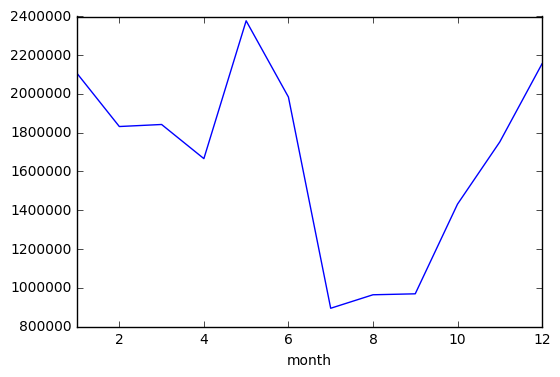

In [219]:
month_twitter['userId'].plot()

In [314]:
month_twitter['userId']

month
1     2106146
2     1832136
3     1842657
4     1666459
5     2377830
6     1984352
7      894137
8      963749
9      968679
10    1431583
11    1752590
12    2156102
Name: userId, dtype: int64

In [252]:
l = {i:[] for i in range(12)}
for k in time_country_dictionary.keys():
    l[int(k[5:7])-1].append(time_country_dictionary[k]['input'])

In [255]:
[np.std(l[i]) for i in range(12)]

[241.11955599851876,
 29.171595320976412,
 31.384945776470307,
 28.370637999130711,
 31.089747687270464,
 29.074114470287913,
 16.707140522047467,
 18.820342430898492,
 20.61990217329237,
 22.696044901678004,
 21.8186063173763,
 141.04298423502121]

### Periodical Behavior

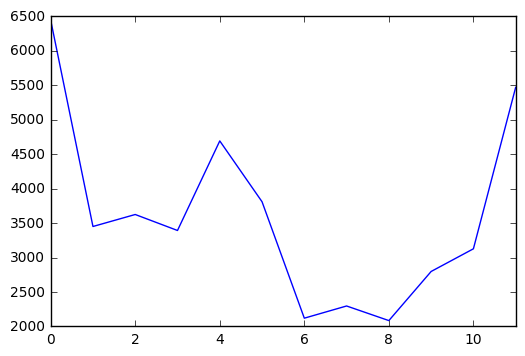

In [251]:
pd.Series(l).plot()

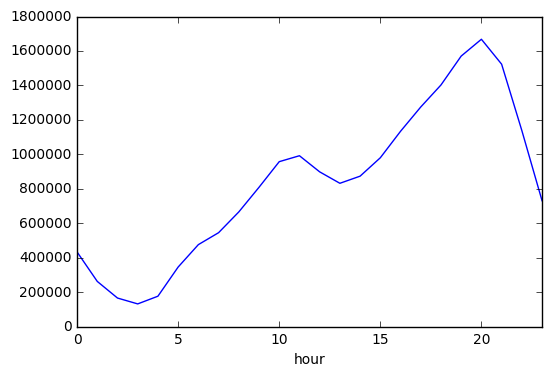

In [218]:
hour_twitter['time_id'].plot()

In [221]:
spec_day = gp_total_twitter.get_group('2014-01-02').copy()

In [319]:
c = spec_day.groupby('hour').count()

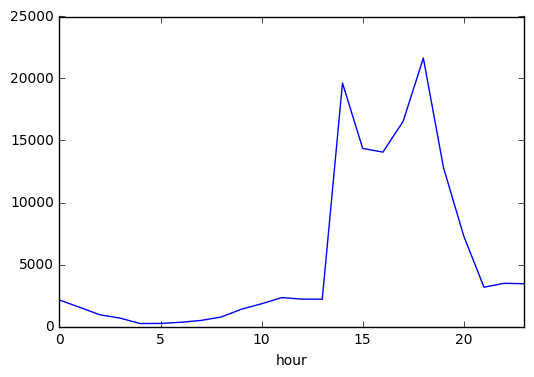

In [321]:
c['day'].plot()

In [327]:
spec_day.groupby('userId').count().head()

1,createdAt,day,hour,month,placeId,weekday
userId,,,,,,
5757,10,10,10,10,10,10
17863,4,4,4,4,4,4
19653,4,4,4,4,4,4
22573,2,2,2,2,2,2
55223,8,8,8,8,8,8


In [330]:
p = spec_day.groupby('placeId').count()

In [236]:
d = pd.merge(spec_day, pId_geo_df_total.reset_index()[['placeId', 'country_code', 'state']], how="left", on='placeId')

In [239]:
peak_hour = d[(d.hour > 13) & (d.hour < 20)]

In [240]:
peak_hour['state'].value_counts()

Graubünden - Grigioni - Grischun    8812
Sankt Gallen                        6774
Genève                              6672
Fribourg - Freiburg                 5948
Bourgogne-Franche-Comté             4986
Vaud                                4790
Valais - Wallis                     4566
Zürich                              4470
Aargau                              3964
Solothurn                           3964
Schaffhausen                        3956
Luzern                              3928
Glarus                              3908
Bayern                              3862
Nidwalden                           3758
Basel-Landschaft                    3742
Thurgau                             2820
Auvergne-Rhône-Alpes                2726
Jura                                2478
LOM                                 2280
PIE                                 2010
Schwyz                              1764
Bern - Berne                        1658
Neuchâtel                           1294
Vorarlberg      

In [214]:
hour_twitter = total_twitter.groupby('hour').count()

In [38]:
gp_total_twitter = total_twitter.groupby('time_id')

In [104]:
date_x_total_tw = gp_total_twitter.count()[['createdAt']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c16bc18>]], dtype=object)

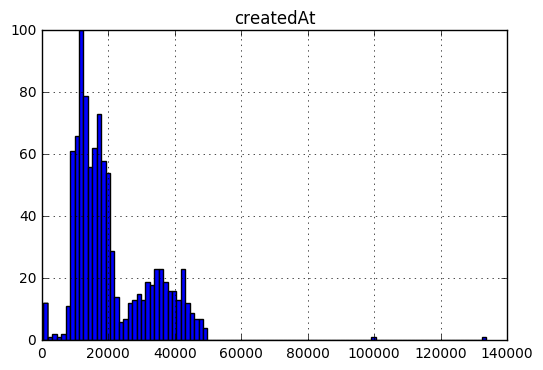

In [120]:
date_x_total_tw[date_x_total_tw.createdAt > 500].hist(bins=100)

In [112]:
date_x_total_tw.apply(lambda x: x.argmax())

1
createdAt    2014-01-02
dtype: object

In [107]:
date_x_total_tw.loc['2014-01-02']

1
createdAt    133772
Name: 2014-01-02, dtype: int64